# COVID-19 Case Forecaster using ARIMA Models

Using standard ARIMA forecasting techniques, I looked to predict the future of corona-virus cases in India

### Standard Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### pmdarima helps efficiently calculate the best p,d,q values for ARIMA models

In [2]:
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Imported the dataset called confirmed.csv. I'm using data from March 12 onwards

In [4]:
# cvd19_confirmed = pd.read_csv('confirmed.csv', index_col='Date', parse_dates=True)[50:]
cvd19_deaths = pd.read_csv('deaths.csv', index_col='Date', parse_dates=True)

In [5]:
cvd19_deaths.index.freq = 'D'

In [6]:
cvd19_deaths.head()

,Unnamed: 0,India
Date,,
2020-01-22,0,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0
2020-01-26,4,0


In [7]:
cvd19_deaths.tail()

,Unnamed: 0,India
Date,,
2020-06-01,131,5608
2020-06-02,132,5829
2020-06-03,133,6088
2020-06-04,134,6363
2020-06-05,135,6649


In [8]:
cvd19_deaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136 entries, 2020-01-22 to 2020-06-05
Freq: D
Data columns (total 2 columns):
Unnamed: 0    136 non-null int64
India         136 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


### Setting index, cleaning blank columns

In [9]:
cvd19_deaths = cvd19_deaths.drop('Unnamed: 0', axis=1)

In [10]:
len(cvd19_deaths['India'])

136

In [11]:
cvd19_deaths.tail(20)

,India
Date,
2020-05-17,3025
2020-05-18,3156
2020-05-19,3302
2020-05-20,3434
2020-05-21,3584
2020-05-22,3726
2020-05-23,3868
2020-05-24,4024
2020-05-25,4172


### Importing plot_acf, plot_pacf for understanding nature of data. 
### Importing seasonal_decompose to find seasonality and trend of data

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
decompose = seasonal_decompose(cvd19_deaths['India'], model='additive');

#### Data is non seasonal

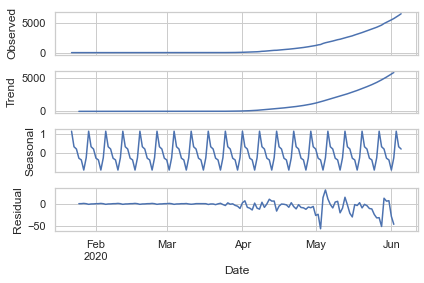

In [14]:
decompose.plot();

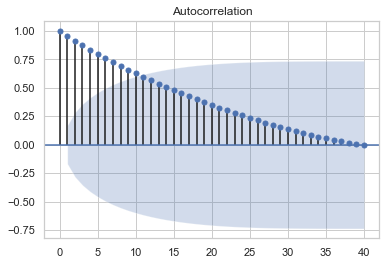

In [15]:
acf=plot_acf(cvd19_deaths['India'], lags=40)

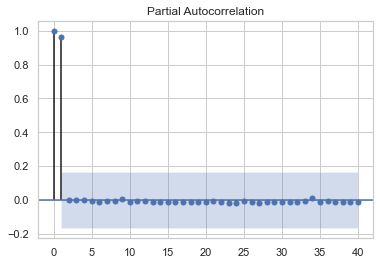

In [16]:
pacf=plot_pacf(cvd19_deaths['India'], lags=40)

In [17]:
# Strong AR System. p = 1, q = 0

In [18]:
pmd = auto_arima(cvd19_deaths['India'], seasonal=False, trace=True)

Fit ARIMA: order=(2, 2, 2); AIC=1130.305, BIC=1147.692, Fit time=2.558 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1173.284, BIC=1179.080, Fit time=0.005 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1138.809, BIC=1147.503, Fit time=0.071 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1134.581, BIC=1143.275, Fit time=0.047 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1136.962, BIC=1151.451, Fit time=0.255 seconds
Fit ARIMA: order=(3, 2, 2); AIC=1130.313, BIC=1150.598, Fit time=0.780 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1136.962, BIC=1151.452, Fit time=0.292 seconds
Fit ARIMA: order=(2, 2, 3); AIC=1131.585, BIC=1151.870, Fit time=0.619 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1134.963, BIC=1146.554, Fit time=0.190 seconds
Fit ARIMA: order=(3, 2, 3); AIC=1133.513, BIC=1156.696, Fit time=0.872 seconds
Total fit time: 6.070 seconds


### Best fit model is (0, 2, 1)

In [19]:
pmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  134
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -559.152
Method:                       css-mle   S.D. of innovations             15.615
Date:                Sat, 13 Jun 2020   AIC                           1130.305
Time:                        18:14:51   BIC                           1147.692
Sample:                             2   HQIC                          1137.370
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1872      2.639      1.208      0.229      -1.986       8.360
ar.L1.D2.y     0.9442      0.124      7.620      0.000       0.701       1.187
ar.L2.D2.y     0.0371      0.127      0.292      0.770      -0.212       0.286
ma.L1.D2.y    -1.6186      0.093    -17.349      0.000      -1.801      -1.436
ma.L2.D2.y     0.6637      0.098      6.747      0.000       0.471       0.857
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0184           +0.0000j            1.0184            0.0000
AR.2          -26.4583           +0.0000j           26.4583            0.5000
MA.1            1.2194           -0.1407j            1.2275           -0.0183
MA.2            1.2194           +0.1407j            1.2275            0.0183
-----------------------------------------------------------------------------
"""

### Importing ARIMA library

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model=ARIMA(cvd19_deaths['India'], order=(2, 2, 2))

In [22]:
fit_model=model.fit()

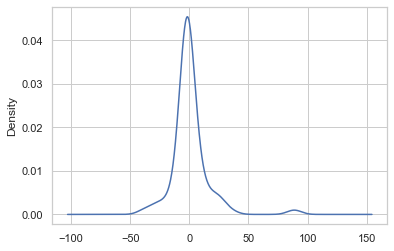

In [23]:
fit_model.resid.plot(kind='kde')

In [24]:
future_deaths = pd.DataFrame()

In [25]:
future_deaths['Deaths'] = fit_model.predict(start=2, end=len(cvd19_deaths)+12, typ='levels')

In [26]:
future_deaths.tail(12)

,Deaths
2020-06-07,7215.930428
2020-06-08,7512.570527
2020-06-09,7817.679337
2020-06-10,8131.160776
2020-06-11,8452.921405
2020-06-12,8782.869434
2020-06-13,9120.914729
2020-06-14,9466.968783
2020-06-15,9820.944681
2020-06-16,10182.757077


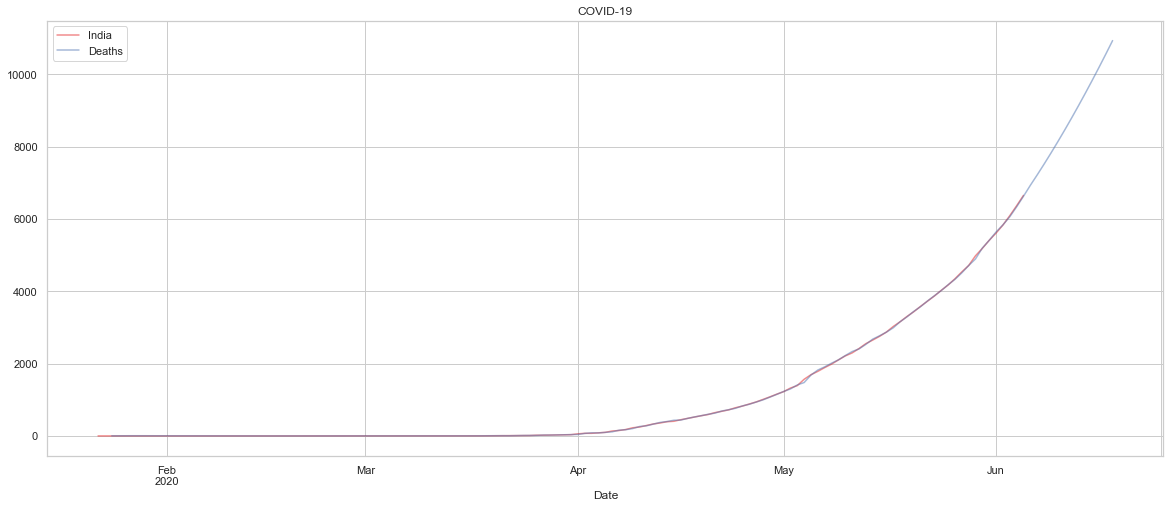

In [27]:
cvd19_deaths.plot(figsize=(20, 8), legend=True, colormap='Set1', alpha=0.5, title='COVID-19')
future_deaths['Deaths'].plot(legend=True, alpha=0.5)

In [28]:
future_deaths['New Deaths'] = future_deaths['Deaths'].diff(1)

In [29]:
future_deaths.head()

,Deaths,New Deaths
2020-01-24,3.187280,NaN
2020-01-25,4.633676,1.446396
2020-01-26,5.530299,0.896623
2020-01-27,5.725457,0.195158
2020-01-28,5.383568,-0.341889


In [30]:
future_deaths.tail(15)

,Deaths,New Deaths
2020-06-04,6333.238294,274.082566
2020-06-05,6625.547948,292.309653
2020-06-06,6927.832351,302.284404
2020-06-07,7215.930428,288.098076
2020-06-08,7512.570527,296.640099
2020-06-09,7817.679337,305.108810
2020-06-10,8131.160776,313.481439
2020-06-11,8452.921405,321.760629
2020-06-12,8782.869434,329.948029
2020-06-13,9120.914729,338.045296


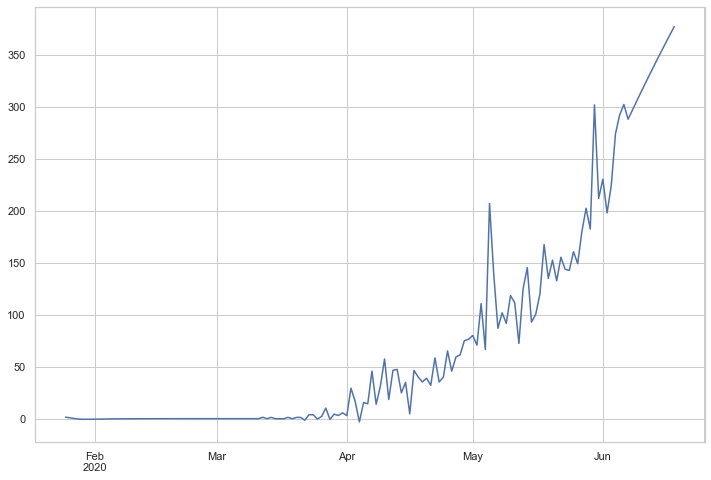

In [31]:
future_deaths['New Deaths'].plot(figsize=(12, 8))